In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'gdrive/My Drive/MaskData1/Train'
valid_path = 'gdrive/My Drive/MaskData1/Test'

In [4]:
# useful for getting number of output classes
folders = glob('gdrive/My Drive/MaskData1/Train/*')
print(len(folders))

2


In [5]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('gdrive/My Drive/MaskData1/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1194 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('gdrive/My Drive/MaskData1/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 244 images belonging to 2 classes.


In [14]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
38/38 [==============================] - 416s 11s/step - loss: 2.6353 - accuracy: 0.5879 - val_loss: 0.9334 - val_accuracy: 0.5615
Epoch 2/50
38/38 [==============================] - 16s 427ms/step - loss: 0.5025 - accuracy: 0.7621 - val_loss: 0.5121 - val_accuracy: 0.7336
Epoch 3/50
38/38 [==============================] - 16s 412ms/step - loss: 0.3930 - accuracy: 0.8216 - val_loss: 0.4374 - val_accuracy: 0.8033
Epoch 4/50
38/38 [==============================] - 16s 420ms/step - loss: 0.4964 - accuracy: 0.7596 - val_loss: 0.3350 - val_accuracy: 0.8689
Epoch 5/50
38/38 [==============================] - 16s 417ms/step - loss: 0.3027 - accuracy: 0.8769 - val_loss: 0.3642 - val_accuracy: 0.8361
Epoch 6/50
38/38 [==============================] - 16s 416ms/step - loss: 0.3434 - accuracy: 0.8467 - val_loss: 0.7376 - val_accuracy: 0.6352
Epoch 7/50
38/38 [==============================] - 16s 411ms/step 

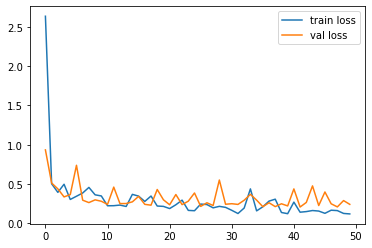

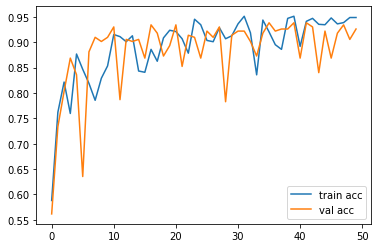

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
y_pred = model.predict(test_set)

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

[0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1
 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1
 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1]


In [20]:
# Save the Trained Model
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [21]:
### 2nd Part

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
#model=load_model('model_resnet50.h5')

In [34]:
#select a random image of a person with mask and do prediction
img=image.load_img('gdrive/My Drive/MaskData1/Test/WithMask/233-with-mask.jpg',target_size=(224,224))

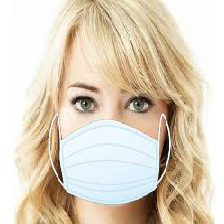

In [35]:
img

In [36]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [254., 254., 254.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [254., 254., 254.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [254., 254., 254.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [254., 254., 254.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [254., 254., 254.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [37]:
x.shape

(224, 224, 3)

In [38]:
x = x/255

In [39]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [40]:
model.predict(img_data)

array([[6.6050001e-05, 9.9993396e-01]], dtype=float32)

In [41]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([1])

In [43]:
#select a random image of a person with mask out mask and do prediction
img2 = image.load_img('gdrive/My Drive/MaskData1/Test/WithOutMask/119.jpg',target_size=(224,224))

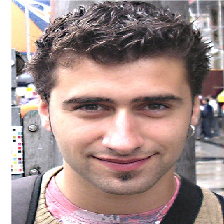

In [44]:
img2

In [45]:
x=image.img_to_array(img)
x = x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [46]:
model.predict(img_data)

array([[6.6050001e-05, 9.9993396e-01]], dtype=float32)

In [47]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([1])